# Лабораторная работа № 3

## Обработка признаков (часть 2)

## Цель лабораторной работы:
 <b> изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.</b>

## Требования к отчету:
- титульный лист;
- описание задания;
- текст программы;
- экранные формы с примерами выполнения программы.

## Задание:

- Выбрать один или несколько наборов данных (датасетов) для решения следующих задач.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  * масштабирование признаков (не менее чем тремя способами);
  * обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
  * обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
  * отбор признаков:
    + один метод из группы методов фильтрации (filter methods);
    + один метод из группы методов обертывания (wrapper methods);
    + один метод из группы методов вложений (embedded methods).


## Датасет 

[ссылка](https://www.kaggle.com/crowdflower/twitter-user-gender-classification)



- unitid: a unique id for user
- _golden: whether the user was included in the gold standard for the - model; TRUE or FALSE
- unitstate: state of the observation; one of finalized (for contributor-judged) or golden (for gold standard observations)
- trustedjudgments: number of trusted judgments (int); always 3 for non-golden, and what may be a unique id for gold standard observations
- lastjudgment_at: date and time of last contributor judgment; blank for gold standard observations
- gender: one of male, female, or brand (for non-human profiles)
- gender:confidence: a float representing confidence in the provided gender
- profile_yn: "no" here seems to mean that the profile was meant to be part of the dataset but was not available when contributors went to judge it
- profile_yn:confidence: confidence in the existence/non-existence of the profile
- created: date and time when the profile was created
- description: the user's profile description
- fav_number: number of tweets the user has favorited
- gender_gold: if the profile is golden, what is the gender?
- link_color: the link color on the profile, as a hex value
- name: the user's name
- profileyngold: whether the profile y/n value is golden
- profileimage: a link to the profile image
- retweet_count: number of times the user has retweeted (or possibly, been retweeted)
- sidebar_color: color of the profile sidebar, as a hex value
- text: text of a random one of the user's tweets
- tweet_coord: if the user has location turned on, the coordinates as a string with the format "[latitude, longitude]"
- tweet_count: number of tweets that the user has posted
- tweet_created: when the random tweet (in the text column) was created
- tweet_id: the tweet id of the random tweet
- tweet_location: location of the tweet; seems to not be particularly normalized
- user_timezone: the timezone of the user

In [ ]:
# !unzip twitter.zip
!pip install mlxtend
!pip install catboost

     |████████████████████████████████| 67.3MB 56kB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('gender-classifier-DFE-791531.csv', encoding='latin1')
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,(rp),302,female,0084B4,capuletrosa,yes,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",2513,male,CFB929,BenNight41,yes,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,50,male,0084B4,realuzzyfluxz,yes,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,Anti-statist; I homeschool my kids. Aspiring t...,70804,female,9266CC,argumatronic,yes,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


## Масштабирование признаков

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
df.dtypes

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
gender                    object
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                 int64
gender_gold               object
link_color                object
name                      object
profile_yn_gold           object
profileimage              object
retweet_count              int64
sidebar_color             object
text                      object
tweet_coord               object
tweet_count                int64
tweet_created             object
tweet_id                 float64
tweet_location            object
user_timezone             object
dtype: object

### StandardScaler

In [ ]:
df.tweet_count.describe()

count    2.005000e+04
mean     3.892469e+04
std      1.168371e+05
min      1.000000e+00
25%      2.398000e+03
50%      1.144150e+04
75%      4.002750e+04
max      2.680199e+06
Name: tweet_count, dtype: float64

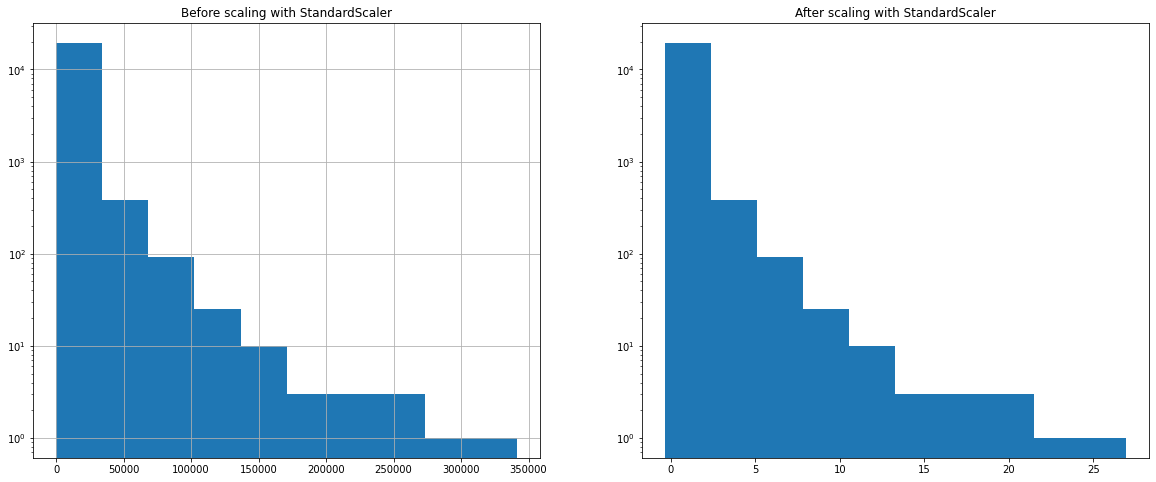

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.title('Before scaling with StandardScaler')
ax = df.fav_number.hist()
plt.yscale('log')

sd_scaler = StandardScaler()
scaled_fav_number = sd_scaler.fit_transform(np.array(df.fav_number).reshape(-1, 1))
plt.subplot(122)
plt.title('After scaling with StandardScaler')
plt.hist(scaled_fav_number)
plt.yscale('log')
plt.show()

### MinMaxScaler

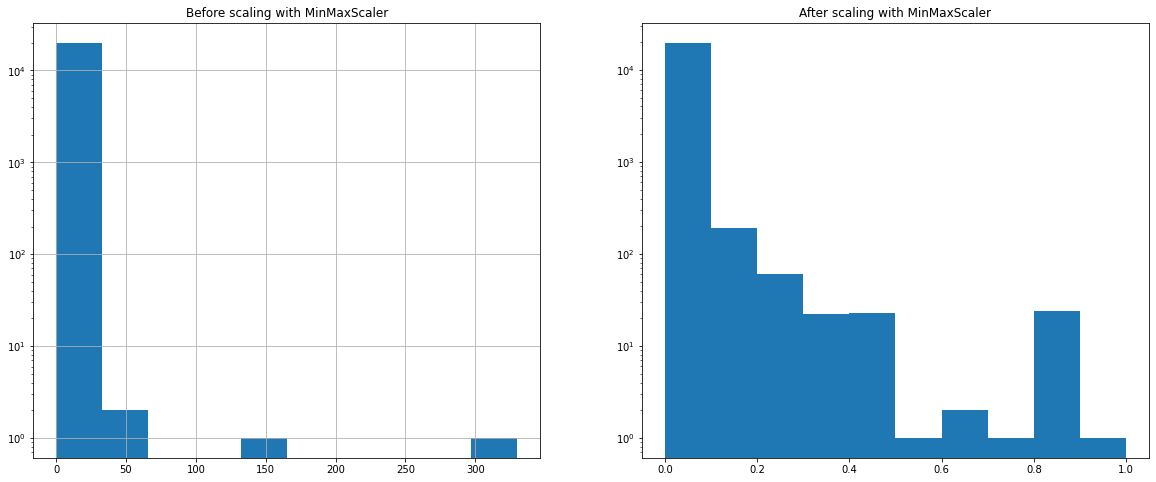

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
ax = df.retweet_count.hist()
plt.title('Before scaling with MinMaxScaler')
plt.yscale('log')

sd_scaler = MinMaxScaler()
scaled__minmax_tweet_count = sd_scaler.fit_transform(np.array(df.tweet_count).reshape(-1, 1))
plt.subplot(122)
plt.title('After scaling with MinMaxScaler')
plt.hist(scaled__minmax_tweet_count)
plt.yscale('log')
plt.show()

### RobustScaler

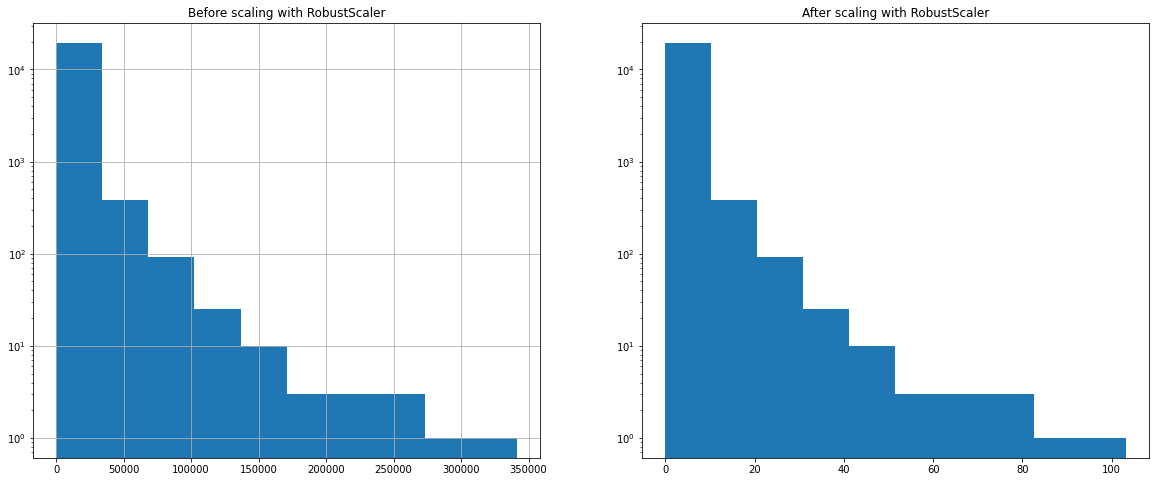

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.title('Before scaling with RobustScaler')
ax = df.fav_number.hist()
plt.yscale('log')

sd_scaler = RobustScaler()
scaled_robust_fav_number = sd_scaler.fit_transform(np.array(df.fav_number).reshape(-1, 1))
plt.subplot(122)
plt.title('After scaling with RobustScaler')
plt.hist(scaled_robust_fav_number)
plt.yscale('log')
plt.show()

## Обработка выбросов для численных признаков

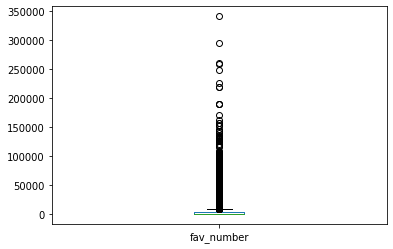

In [ ]:
df.fav_number.plot(kind='box')

### обработка выброса с помощью интерквартильного размаха

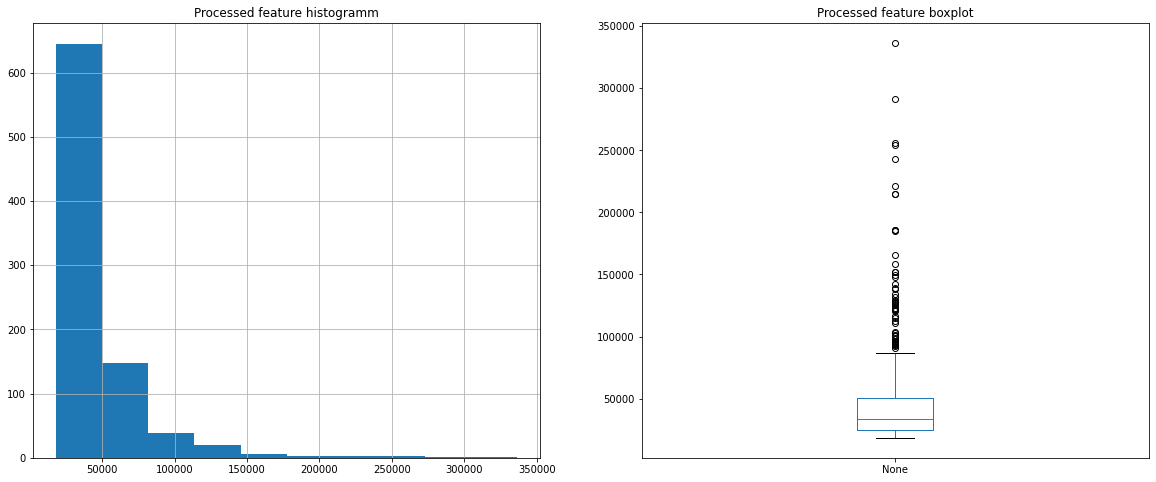

In [ ]:
q75 = np.percentile(df.fav_number, 75)
q25 = np.percentile(df.fav_number, 25)
mean = df.fav_number.mean()
std = df.fav_number.std()
iqr = q75 - q25
upper_outlier = mean+1.5*std
fav_number_new = pd.Series([i-1.5*iqr for i in df.fav_number if i >= upper_outlier])
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.title('Processed feature histogramm')
ax3 = fav_number_new.hist()

plt.subplot(122)
plt.title('Processed feature boxplot')
ax4 = fav_number_new.plot(kind='box')
plt.show()

### замена выброса на верхнюю границу

Found upper outlier is 23160.065523881327


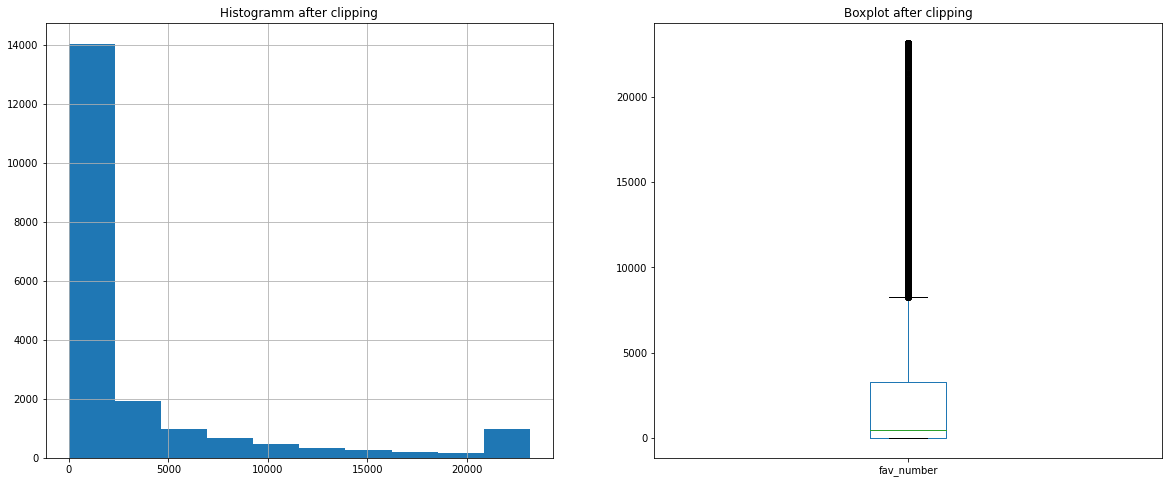

In [ ]:
print('Found upper outlier is', upper_outlier)
dropped_ = df.fav_number.clip(upper=upper_outlier)
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.title('Histogramm after clipping')
ax_d_h = dropped_.hist()

plt.subplot(122)
plt.title('Boxplot after clipping')
ax_d = dropped_.plot(kind='box')

plt.show()

## Обработка "цветовой фичи"

In [ ]:
print('example of data', df.link_color[0])

def get_color_vals_rgb(color_text):
  if color_text != '0' and len(color_text) == 6:
    return tuple(int(color_text[i:i+2], 16) for i in (0, 2, 4))
  else:
    return (0, 0, 0)

r = []
g = []
b = []
for col in list(df.link_color):
  tmp_col = get_color_vals_rgb(col)
  r.append(tmp_col[0])
  g.append(tmp_col[1])
  b.append(tmp_col[2])

r,g,b

df['r'] = r
df['g'] = g
df['b'] = b

example of data 08C2C2


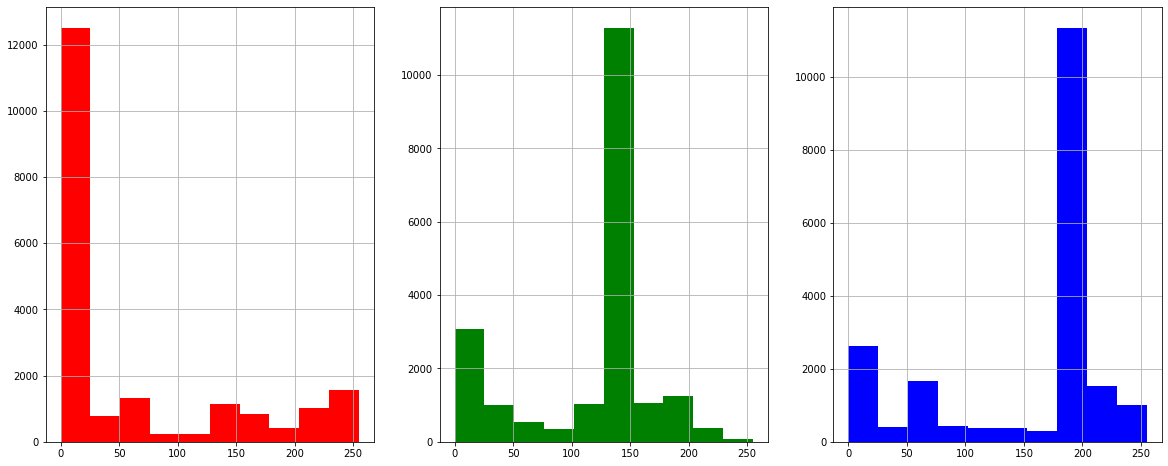

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(131)
ax = df.r.hist(color='r')

plt.subplot(132)
ax2 = df.g.hist(color='g')

plt.subplot(133)
ax3 = df.b.hist(color='b')

## Отбор признаков

Подшотовим заранее целевой признак - пол

In [ ]:
df = df[(df.gender == 'male') | (df.gender == 'female')]

df['gender'] = df.gender.apply(lambda x: 1 if x == 'female' else 0)

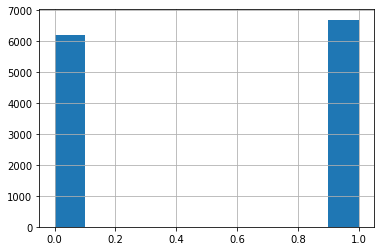

In [ ]:
df.gender.hist()

отберем только обработанные и изначально численные признаки

In [ ]:
df_numeric = df[[i for i in df.columns if df[i].dtype != 'O' and df[i].dtype !='bool']]
df_numeric

,_unit_id,_trusted_judgments,gender,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id,r,g,b
0,815719226,3,0,1.0000,1.0,0,0,110964,6.587300e+17,8,194,194
1,815719227,3,0,1.0000,1.0,68,0,7471,6.587300e+17,0,132,180
2,815719228,3,0,0.6625,1.0,7696,1,5617,6.587300e+17,171,184,194
3,815719229,3,0,1.0000,1.0,202,0,1693,6.587300e+17,0,132,180
4,815719230,3,1,1.0000,1.0,37318,0,31462,6.587300e+17,59,148,217
...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,259,1,1.0000,1.0,302,0,783,6.587400e+17,0,132,180
20046,815757681,248,0,1.0000,1.0,2513,0,13523,6.587300e+17,207,185,41
20047,815757830,264,0,1.0000,1.0,50,0,26419,6.587400e+17,0,132,180
20048,815757921,250,1,0.8489,1.0,70804,0,56073,6.587300e+17,146,102,204


In [ ]:
X = df_numeric[[i for i in df_numeric.columns if i !='gender']]
y = df_numeric.gender

### Метод фильтрации связанный со статистическими характеристиками

In [ ]:
from sklearn.feature_selection import SelectKBest

res = SelectKBest(k=5).fit(X, y)

selected_features = [name for name, mask in zip(X.columns, res.get_support()) if mask == True]
print(selected_features)

['_unit_id', 'gender:confidence', 'fav_number', 'tweet_id', 'r']


### Метод обертывания

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

efs1 = EFS(knn, 
           min_features=2,
           max_features=3,
           scoring='roc_auc',
           print_progress=True,
           cv=5, n_jobs=-1)

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 220/220

Best accuracy score: 0.59
Best subset (indices): (8, 9, 10)
Best subset (corresponding names): ('r', 'g', 'b')


### Метод вложений

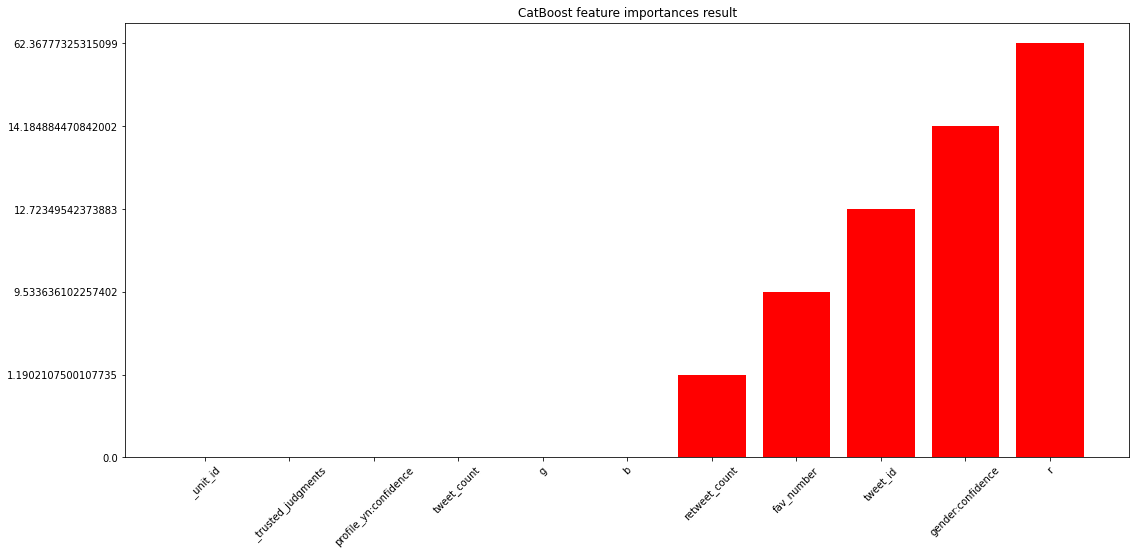

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

cat_clf = CatBoostClassifier(random_state=123, iterations=3000, early_stopping_rounds=10,
                             eval_metric='F1', verbose=False)
cat_clf.fit(X_train, y_train, eval_set=(X_val, y_val))

res = np.array(sorted([(n,float(f)) for n,f in zip(X_train.columns, cat_clf.feature_importances_)], key=lambda x: x[1], reverse=False))

plt.figure(figsize=(18, 8))
plt.bar(res[:,0], res[:,1], color='r')
plt.title('CatBoost feature importances result')
plt.xticks(res[:,0], rotation=45)
plt.show()